#License Plate Recognition:

## Train Data Preparation

In [37]:
import pandas as pd
import os
import shutil

# Load the CSV file (assuming it has a column 'image_path' for image file paths)
csv_file = 'Licplatesdetection_train.csv'  # Replace with your actual CSV file path
train_df = pd.read_csv(csv_file).iloc[:800]

# Specify the destination folder where you want to copy/move the images
destination_folder = r'C:\Users\chint\projects\object_detection\train\images'  # Adjust the folder path as needed
os.makedirs(destination_folder, exist_ok=True)

# Iterate through the image paths in the CSV file
for index, row in train_df.iterrows():
    source_path = r'C:\Users\chint\projects\object_detection\license_plates_detection_train'
    image_path = os.path.join(source_path, row['img_id'])
    image_name = os.path.basename(image_path)  # Get the image file name

    # Check if the image exists
    if os.path.exists(image_path):
        # Copy the image to the destination folder
        shutil.copy(image_path, os.path.join(destination_folder, image_name))  # For moving, use shutil.move
        print(f"Copied: {image_name}")
    else:
        print(f"Image not found: {image_path}")

print("All images copied to the destination folder.")


In [ ]:
import pandas as pd
import os
from PIL import Image

# Load the CSV file
train_df = pd.read_csv('Licplatesdetection_train.csv').iloc[:800]
output_dir = r'C:\Users\chint\projects\object_detection\train\labels'
images_dir = r'C:\Users\chint\projects\object_detection\train\images'
os.makedirs(output_dir, exist_ok=True)
delete = []

for index, row in train_df.iterrows():
    img_id = row['img_id']
    img_path = os.path.join(images_dir, img_id)
    img_width, img_height = Image.open(img_path).size
    ymin, xmin, ymax, xmax = row['ymin'], row['xmin'], row['ymax'], row['xmax']

    #The coordinates are normalized by dividing x_center and width by the image width,
    #and y_center and height by the image height.

    # Calculate width and height of the bounding box
    box_width = xmax - xmin
    box_height = ymax - ymin

    # Calculate the center of the bounding box
    x_center = xmin + (box_width / 2)
    y_center = ymin + (box_height / 2)

    # Normalize coordinates by dividing by the image dimensions
    x_center_norm = x_center / img_width
    y_center_norm = y_center / img_height
    width_norm = box_width / img_width
    height_norm = box_height / img_height

    label = f"0 {x_center_norm} {y_center_norm} {width_norm} {height_norm}"
    if x_center_norm>1 or y_center_norm>1 or width_norm> 1 or height_norm > 1:
        #print(img_width, img_height, ymin, xmin, ymax, xmax)
        print(f'error with {img_id}')
        delete.append(img_id)
        continue
    img_id = img_id.split('.')[0]

    output_file = os.path.join(output_dir, f"{img_id}.txt")
    with open(output_file, 'w') as f:
        f.write(label + '\n')

## Validation Data Preparation

In [ ]:
import pandas as pd
import os
import shutil

# Load the CSV file (assuming it has a column 'image_path' for image file paths)
csv_file = 'Licplatesdetection_train.csv'  # Replace with your actual CSV file path
train_df = pd.read_csv(csv_file).iloc[800:]

# Specify the destination folder where you want to copy/move the images
destination_folder = r'C:\Users\chint\projects\object_detection\valid\images'  # Adjust the folder path as needed
os.makedirs(destination_folder, exist_ok=True)

# Iterate through the image paths in the CSV file
for index, row in train_df.iterrows():
    source_path = r'C:\Users\chint\projects\object_detection\license_plates_detection_train'
    image_path = os.path.join(source_path, row['img_id'])
    image_name = os.path.basename(image_path)  # Get the image file name

    # Check if the image exists
    if os.path.exists(image_path):
        # Copy the image to the destination folder
        shutil.copy(image_path, os.path.join(destination_folder, image_name))  # For moving, use shutil.move
        print(f"Copied: {image_name}")
    else:
        print(f"Image not found: {image_path}")

print("All images copied to the destination folder.")


In [ ]:
import pandas as pd
import os

# Load the CSV file
val_df = pd.read_csv('Licplatesdetection_train.csv').iloc[800:]
val_df.columns = ['img_id', 'ymin', 'xmin', 'ymax', 'xmax']
output_dir = r'C:\Users\chint\projects\object_detection\valid\labels'
images_dir = r'C:\Users\chint\projects\object_detection\valid\images'
os.makedirs(output_dir, exist_ok=True)

for index, row in val_df.iterrows():
    img_id = row['img_id']
    img_path = os.path.join(images_dir, img_id)
    img_width, img_height = Image.open(img_path).size
    ymin, xmin, ymax, xmax = row['ymin'], row['xmin'], row['ymax'], row['xmax']

    #The coordinates are normalized by dividing x_center and width by the image width,
    #and y_center and height by the image height.

    # Calculate width and height of the bounding box
    box_width = xmax - xmin
    box_height = ymax - ymin

    # Calculate the center of the bounding box
    x_center = xmin + (box_width / 2)
    y_center = ymin + (box_height / 2)

    # Normalize coordinates by dividing by the image dimensions
    x_center_norm = x_center / img_width
    y_center_norm = y_center / img_height
    width_norm = box_width / img_width
    height_norm = box_height / img_height

    if x_center_norm>1 or y_center_norm>1 or width_norm> 1 or height_norm > 1:
        #print(img_width, img_height, ymin, xmin, ymax, xmax)
        print(f'error with {img_id}')
        delete.append(img_id)
        continue

    label = f"0 {x_center_norm} {y_center_norm} {width_norm} {height_norm}"
    img_id = img_id.split('.')[0]

    output_file = os.path.join(output_dir, f"{img_id}.txt")
    with open(output_file, 'w') as f:
        f.write(label + '\n')

## Model Training

In [ ]:
!pip install ultralytics

In [ ]:
from ultralytics import YOLO

# Load a model
model = YOLO("yolov8n.pt")  # load a pretrained model


In [ ]:
# Train the model
results = model.train(data="data.yaml", epochs=200, imgsz =64)

## Saving Model

In [ ]:
model.save("best_model_weights.pt")

## Loading model from local

In [ ]:
from ultralytics import YOLO

# Load the saved model weights
#model = YOLO("best_model_weights.pt")
model = YOLO("best_model_weights.pt")

# Perform inference or further operations using the model
results = model.predict("C:/Users/chint/projects/object_detection/train/images/601.jpg")


## Extracting Text from croped Image using EASYOCR, CV2 abd pytesseract

In [19]:
#!pip install easyocr

In [20]:
#!pip install ultralytics

In [15]:
import cv2
from ultralytics import YOLO
import pytesseract
import easyocr

In [23]:
# Function to detect license plate and extract its content using EasyOCR
def detect_license_plate_and_extract_text(image_path, model_path= "/content/best_model_weights.pt"):
    # Load the YOLO model
    model = YOLO(model_path)

    # Load the image using OpenCV
    image = cv2.imread(image_path)

    # Perform inference on the image using YOLO
    results = model.predict(image_path)

    # Initialize variables to keep track of the highest confidence box (for the license plate)
    highest_confidence = 0
    best_box = None

    # Loop through results and find the bounding box with the highest confidence
    for result in results:
        for box in result.boxes:
            # Extract confidence score
            confidence = box.conf[0].item()

            # Check if the current confidence is the highest
            if confidence > highest_confidence:
                highest_confidence = confidence
                best_box = box  # Store the best bounding box

    # If a bounding box with the highest confidence is found, crop the image
    if best_box:
        # Extract bounding box coordinates (x1, y1, x2, y2)
        x1, y1, x2, y2 = best_box.xyxy[0].cpu().numpy().astype(int)

        # Crop the image based on the bounding box
        cropped_license_plate = image[y1:y2, x1:x2]

        # Save the cropped license plate image (optional)
        crop_filename = "cropped_license_plate.jpg"
        cv2.imwrite(crop_filename, cropped_license_plate)
        print(f"License plate cropped and saved as: {crop_filename}")

        # Use EasyOCR to perform OCR on the cropped license plate image
        reader = easyocr.Reader(['en','ar'])  # Create a reader for English
        result = reader.readtext(cropped_license_plate)

        # Extract and print the text
        if result:
            # Join the detected text into a single string
            license_plate_text = " ".join([text[1] for text in result])
            print(f"Extracted License Plate Text: {license_plate_text.strip()}")
            return license_plate_text.strip()
        else:
            print("No text found in the cropped license plate image.")
            return None
    else:
        print("No bounding box found for license plate.")
        return None



In [33]:
import cv2
import matplotlib.pyplot as plt
from ultralytics import YOLO
import easyocr
import numpy as np


image 1/1 /content/83.jpg: 480x640 1 license_plate, 8.2ms
Speed: 2.4ms preprocess, 8.2ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)
License plate cropped and saved as: cropped_license_plate.jpg


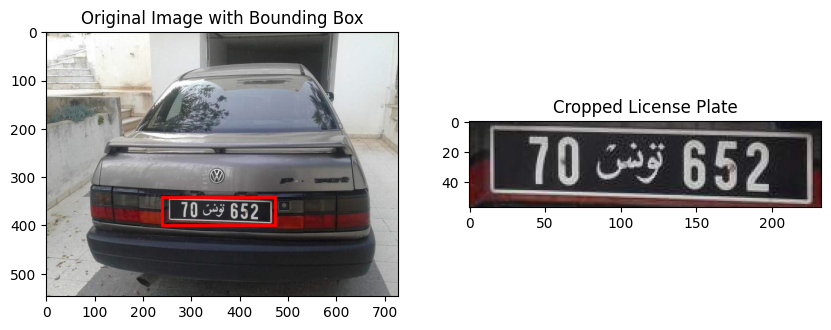

Extracted License Plate Text: 652 تونن 70


In [39]:
# Example usage with only image path:
license_plate_text = detect_license_plate_and_extract_text('/content/83.jpg')